# Python en Finanzas - Trabajo Final

Ejercicio - 
Asumamos que trabajamos en el área de finanzas de una empresa y estamos preparando la reunión mensual.

La empresa tiene en la cartera de inversiones un bono que vence dentro de exactamente 8 años con cupón semestral del 5.875% amortizable al vencimiento con VN 100. Nos ofrecen un Tender (oferta de recompra del bono) pero no nos informaron a qué precio se ejecutaría el Tender en caso de aceptar. Nos van a dar esa información en la misma reunión.

Debemos calcular el precio teórico del bono y su duration. Si el precio teórico es menor que el ofertado para entrar en el Tender aceptaremos, de lo contrario nos quedaremos con el bono.

En el caso en que sea conveniente aceptar el Tender, con el dinero recibido por la venta del bono se quiere invertir en una cartera compuesta por los siguientes activos: S&P 500 (^GSPC), NASDAQ 100 (^NDX), Russell 2000 Value (^RUT), iShares MSCI Emerging Markets ETF (EEM), Vanguard Total International Bond Index Fund ETF Shares (BNDX) con un nivel de volatilidad de 15% y las siguientes restricciones:


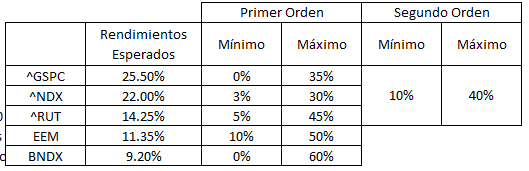

Deseamos conocer los pesos correspondientes a cada índice /ETF que conforman el portfolio óptimo. Calcular los mismo y graficar los retornos de los índices y los histogramas.

En el caso en que no convenga aceptar el Tender, con los cupones que vayamos recibiendo del bono lo vamos a invertir en la acción con mayor ratio de Treynor entre las siguientes posibles: The Walt Disney Company (DIS) , Apple (AAPL), Amazon (AMZN) y Google (GOOGL). Calcular el ratio de Treynor considerando para el cálculo del beta el modelo CAPM y teniendo en cuenta sólo éste ratio recomendar qué accion comprar. Realizar los gráficos de los retornos y los histogramas de los mismos. Para la acción seleccionada calcular el Sharpe Ratio.


Objetivo: Armar una función en donde ingresemos el precio del Tender y nos de como resultado:
los pesos del portfolio óptimo en caso de que sea conveniente vender el bono, junto a los gráficos de retornos y los histogramas de los índices/ETF; de lo contrario, la acción que debemos comprar con el ingreso de dinero, el gráfico de retornos y el histograma y el sharpe ratio de la acción en caso de que no sea conveniente aceptar en el Tender.

Datos necesarios para realizar los cáculos:

Tasa de descuento= 5.25% anual.

Para el cálculo del portfolio óptimo y para el cálculo de los ratios tomar datos diarios desde el 01-09-2021 al 01-09-2023. 

Tasa libre de riesgo constante = 4.75% anual




Pseudocódigo: Pensar la estructura antes de comenzar el código.

[*********************100%%**********************]  4 of 4 completed


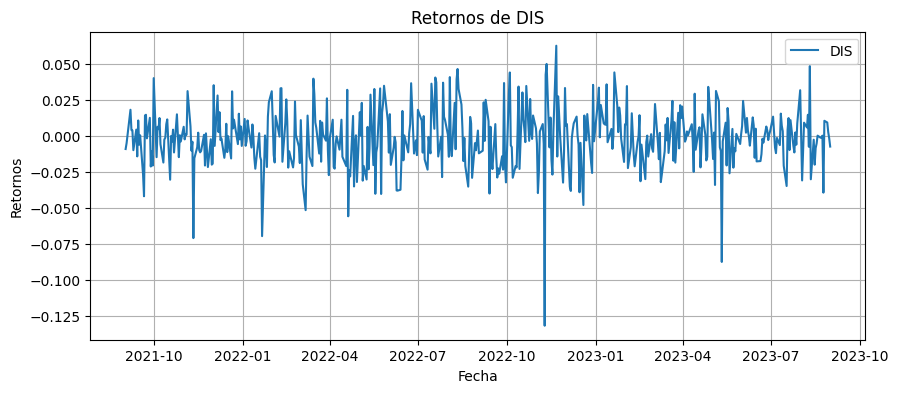

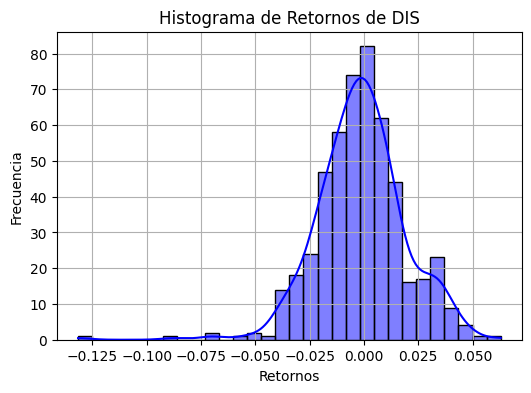

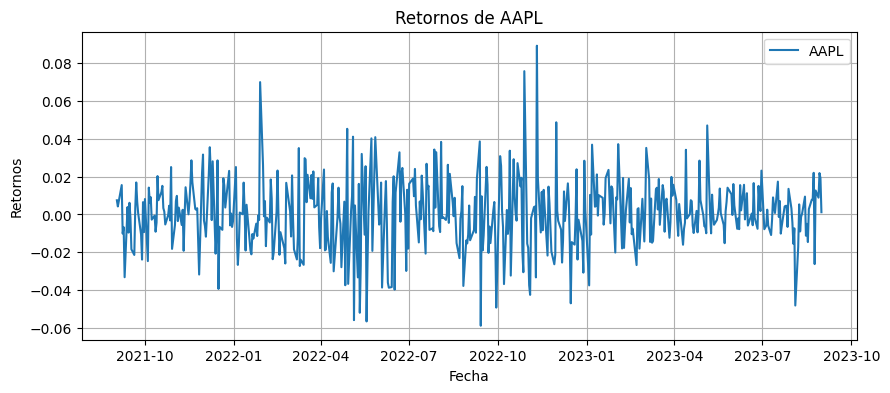

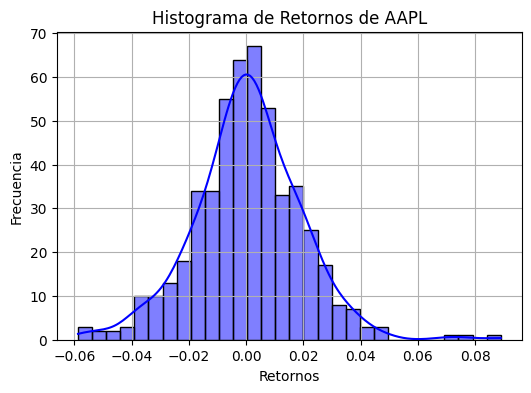

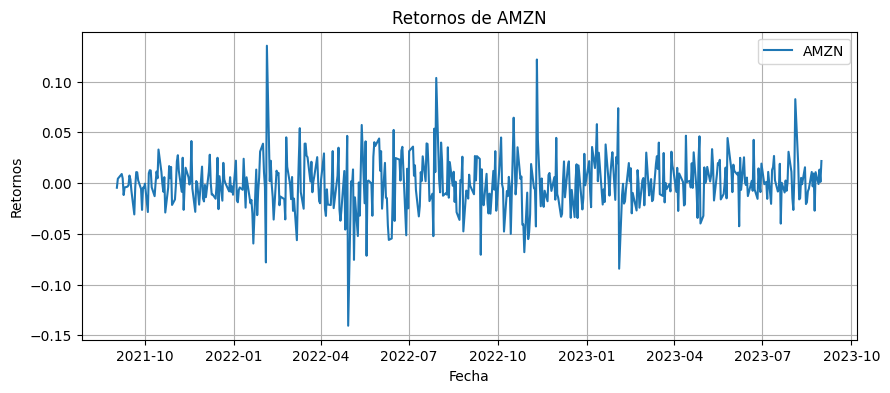

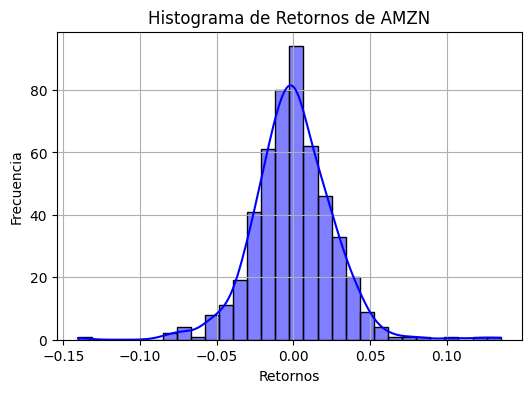

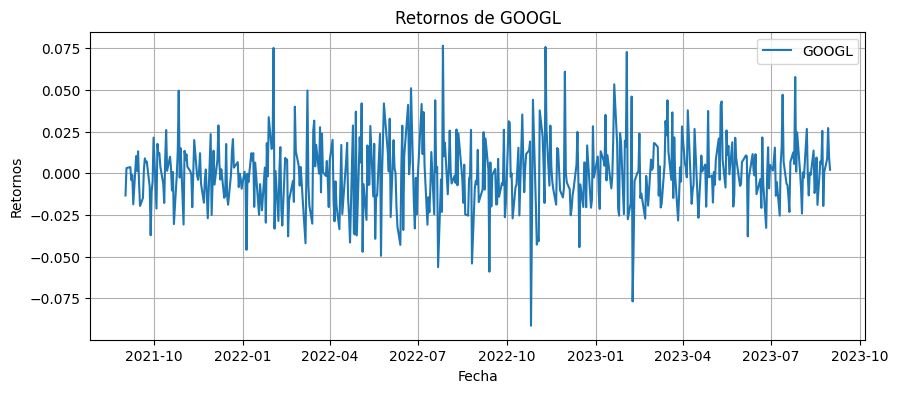

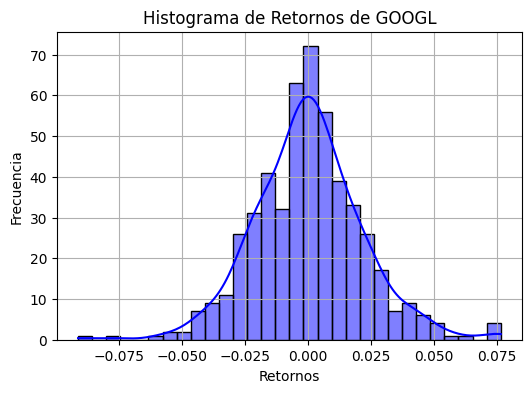

In [28]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Definimos los activos
activos = ["DIS", "AAPL", "AMZN", "GOOGL"]

def calcular_tasas_de_rendimiento():
    tasa_libre_de_riesgo = 0.0475
    
    #Descargar los datos del índice S&P 500
    sp500_data = yf.download('^GSPC', start="2021-09-01", end="2023-09-01")
    
    #Por las dudas verificamos si se han descargado datos para el índice S&P 500
    if sp500_data.empty:
        print("No se encontraron datos para el índice S&P 500.")
        return
    
    # Extraemos los retornos del índice S&P 500
    sp500_returns = sp500_data['Adj Close'].pct_change().dropna()

    retornos = yf.download(activos, start="2021-09-01", end="2023-09-01")['Adj Close'].pct_change().dropna()
    
    def calcular_ratio_treynor(rendimientos_del_activo):
        rendimientos_excesivos_del_activo = rendimientos_del_activo - tasa_libre_de_riesgo
        beta = np.cov(rendimientos_excesivos_del_activo, sp500_returns)[0, 1] / np.var(sp500_returns)
        ratio_treynor = (rendimientos_excesivos_del_activo.mean() * 252) / beta #multiplicamos por 252, porque hay estimativamente esa cantidad de días hábiles/de mercado
        return ratio_treynor  

    ratios_treynor = {}
    for activo in activos:
        ratio_treynor = calcular_ratio_treynor(retornos[activo])
        ratios_treynor[activo] = ratio_treynor
        
#Elegimos al mejor:

    mejor_activo = max(ratios_treynor, key=ratios_treynor.get)
    print(f"Recomendación: Comprar {mejor_activo} con el mayor Ratio Treynor.")
    
    retornos_del_activo_seleccionado = retornos[mejor_activo]
    retornos_excesivos_del_activo_seleccionado = retornos_del_activo_seleccionado - tasa_libre_de_riesgo
    volatilidad_del_activo_seleccionado = np.std(retornos_del_activo_seleccionado) * np.sqrt(252) #nuevamente el truco para anualizar los datos
    ratio_sharpe = (retornos_excesivos_del_activo_seleccionado.mean() * 252) / volatilidad_del_activo_seleccionado
    print(f"Ratio Sharpe de {mejor_activo}: {ratio_sharpe}")

#Para no mezclar, lo hago abajo
import seaborn as sns
def obtener_retornos_histograma(activos):
    # Descarga los datos de los activos
    datos_activos = yf.download(activos, start="2021-09-01", end="2023-09-01")['Adj Close']
    
    #Calcula los retornos diarios de nuevo
    retornos_diarios = datos_activos.pct_change().dropna()
    
    #Generamos gráficos de retornos e histogramas en forma de Loop
    for activo in activos:
        #Gráfico de retornos
        plt.figure(figsize=(10, 4)) #se puede jugar con esto
        plt.plot(retornos_diarios.index, retornos_diarios[activo], label=activo)
        plt.title(f"Retornos de {activo}")
        plt.xlabel("Fecha")
        plt.ylabel("Retornos")
        plt.legend()
        plt.grid(True)
        plt.show()
        
        #Histograma de retornos
        plt.figure(figsize=(6, 4))
        sns.histplot(retornos_diarios[activo], bins=30, kde=True, color='blue')
        plt.title(f"Histograma de Retornos de {activo}")
        plt.xlabel("Retornos")
        plt.ylabel("Frecuencia")
        plt.grid(True)
        plt.show()

#Analizamos
activos_a_analizar = ["DIS", "AAPL", "AMZN", "GOOGL"]
obtener_retornos_histograma(activos_a_analizar)
